In [1]:
import pandas as pd
import torch
import torch.nn as nn

In [4]:
logits = torch.tensor([
    [1.2, 0.5, -0.3],
    [-0.1, 0.9, 0.7],
    [0.3, 0.4, 0.5],
    [1.5, 0.4, -0.5],
    [0.2, -0.1, 0.3]
])

softmax = nn.Softmax(dim=1)
probabilities = softmax(logits)

print(probabilities)

tensor([[0.5815, 0.2888, 0.1297],
        [0.1682, 0.4573, 0.3744],
        [0.3006, 0.3322, 0.3672],
        [0.6811, 0.2267, 0.0922],
        [0.3514, 0.2603, 0.3883]])


In [6]:
torch.sum(probabilities, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

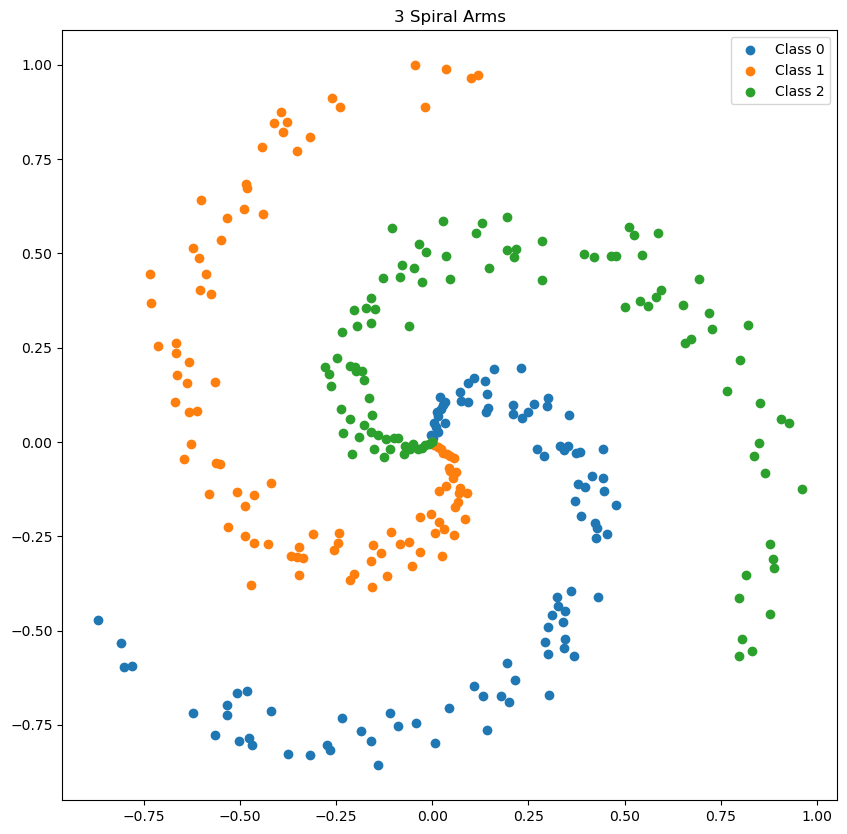

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import math

N = 100  # num_samples_per_class
D = 2  # dimensions
C = 3  # num_classes
X = np.zeros((N * C, D))
y = np.zeros(N * C, dtype=np.int64)

for c in range(C):
    index = 0
    t = np.linspace(0, 1, N)
    # 0 to 4pi/3
    # 2pi/3 to 2pi
    # 4pi/3 to 8pi/3
    # Note:
    # Starts at 0, 2pi/3, 4pi/3
    # Length of path is 4pi/3
    inner_var = np.linspace(
        (2 * math.pi / C) * (c),
        (2 * math.pi / C) * (2 + c),
        N
    ) + np.random.randn(N) * 0.2
    
    for ix in range(N * c, N * (c + 1)):
        X[ix] = t[ix % N] * np.array(
            [np.sin(inner_var[ix % N]), np.cos(inner_var[ix % N])]
        )
        y[ix] = c

# Now, plot the spirals
plt.figure(figsize=(10, 10))
for c in range(C):
    plt.scatter(X[N*c:N*(c+1), 0], X[N*c:N*(c+1), 1], label=f"Class {c}")
plt.legend()
plt.title("3 Spiral Arms")
plt.show()

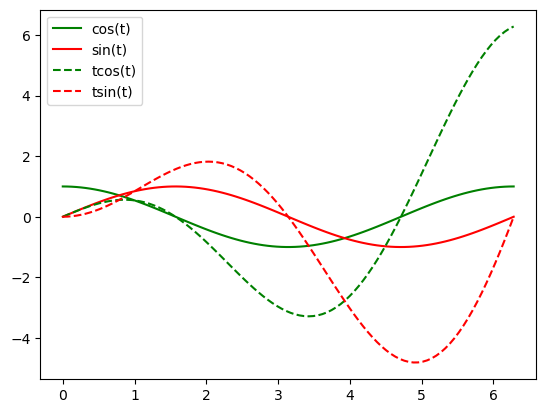

In [18]:
t = np.linspace(0, 4*np.pi/3, 100)
plt.plot(t, np.cos(t), label='cos(t)', color='green')
plt.plot(t, np.sin(t), label='sin(t)', color='red')
plt.plot(t, t * np.cos(t), label='tcos(t)', linestyle='--', color='green')
plt.plot(t, t * np.sin(t), label='tsin(t)', linestyle='--', color='red')
plt.legend()

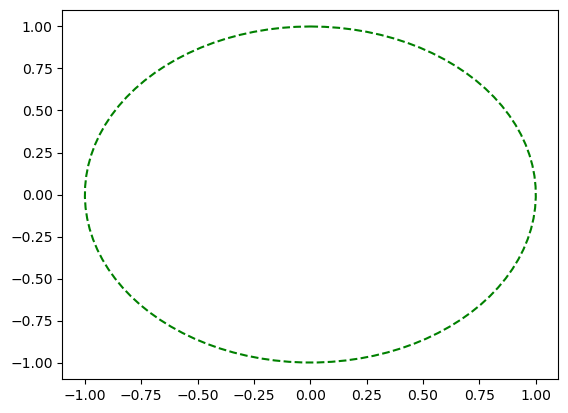

In [20]:
t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color='green', linestyle='--')

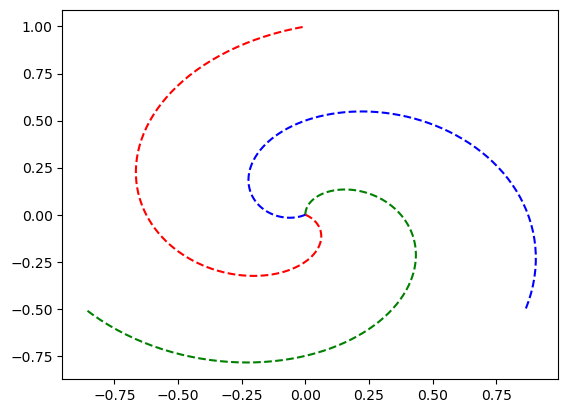

In [31]:
t1 = np.linspace(0, 4*np.pi/3, 100)
t2 = np.linspace(2*np.pi/3, 2*np.pi, 100)
t3 = np.linspace(4*np.pi/3, 8*np.pi/3, 100)
t = np.linspace(0, 1, 100)
plt.plot(t*np.sin(t1), t*np.cos(t1), color='green', linestyle='--')
plt.plot(t*np.sin(t2), t*np.cos(t2), color='red', linestyle='--')
plt.plot(t*np.sin(t3), t*np.cos(t3), color='blue', linestyle='--')

<Axes: >

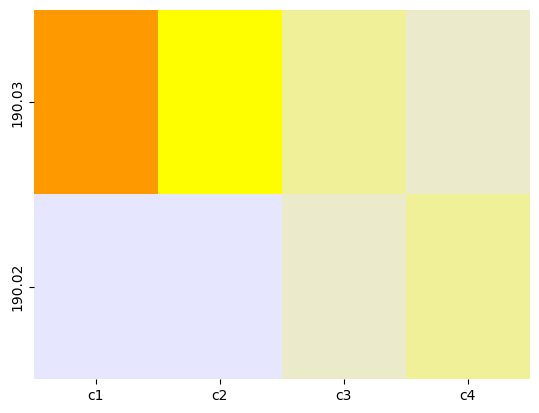

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

colors = [(0.9, 0.9, 1), (0, 0, 0.5)]  # R, G, B colors from light blue to dark blue
colors = [(0.9, 0.9, 1), (1, 0, 0)]  # RGB for light blue and red
colors = [(0.9, 0.9, 1), (1, 1, 0)]  # RGB for light blue and yellow
colors = [(0.9, 0.9, 1), (1, 1, 0), (1, 0.6, 0)]  # RGB values for light blue, yellow, and orange

n_bins = 100  # Number of bins
cmap_name = "custom_blue"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

frame = pd.DataFrame(
    np.array([
        [1000, 500, 200, 100],
        [0, 0, 100, 200],
]), index = ['190.03', '190.02'], columns=['c1', 'c2', 'c3', 'c4'])


sns.heatmap(frame,
            cmap=cm,
            cbar=False)


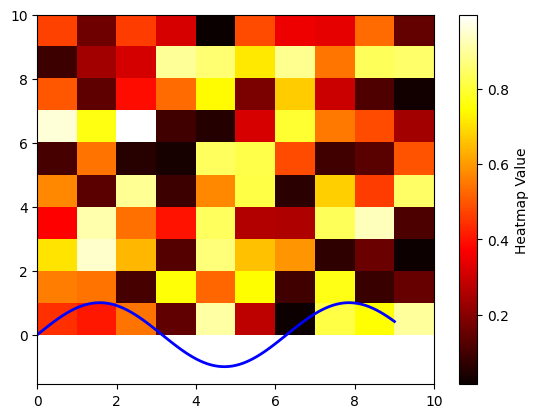

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 9, 100)
y = np.sin(x)

# Plot heatmap
plt.imshow(data_heatmap, cmap='hot', extent=[0, 10, 0, 10], origin='lower', aspect='auto')

# Plot line on top of heatmap
plt.plot(x, y, color='blue', linewidth=2)

plt.colorbar(label="Heatmap Value")  # Display color bar for heatmap
plt.show()

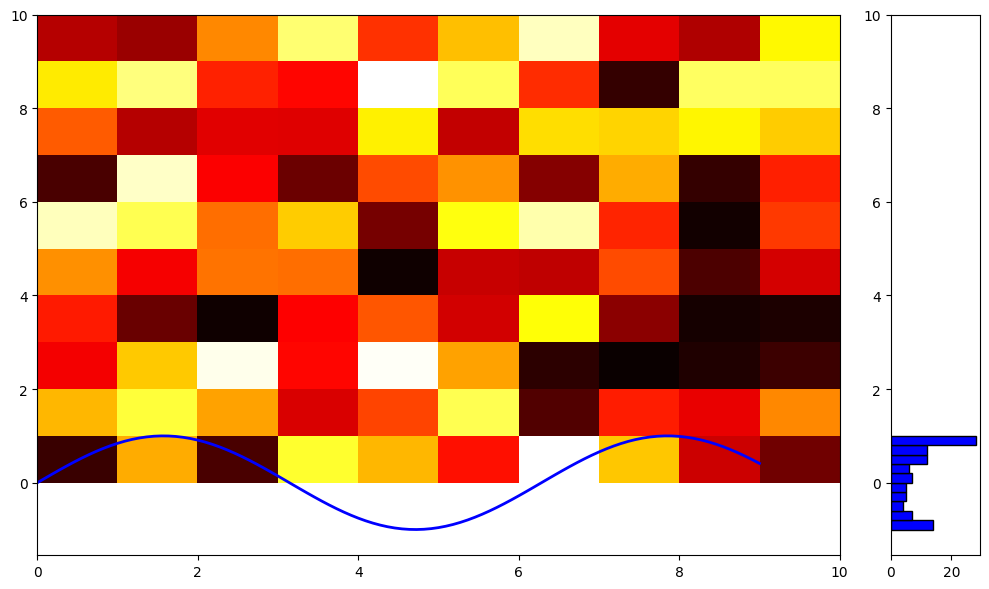

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Sample data
data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 9, 100)
y = np.sin(x)

# Setting up the figure and gridspec
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[9, 1])

# Create the heatmap + line plot on the left
ax0 = plt.subplot(gs[0])
ax0.imshow(data_heatmap, cmap='hot', extent=[0, 10, 0, 10], origin='lower', aspect='auto')
ax0.plot(x, y, color='blue', linewidth=2)

# Create the histogram on the right
ax1 = plt.subplot(gs[1])
ax1.hist(y, orientation='horizontal', bins=10, color='blue', edgecolor='black')

# Sync y-axis limits for both plots
ax1.set_ylim(ax0.get_ylim())

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Sample data
data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 9, 100)
y = np.sin(x)

fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[9, 1])

# Create the heatmap + line plot on the left
ax0 = plt.subplot(gs[0])
ax0.imshow(data_heatmap, cmap='hot', extent=[0, 10, 0, 10], origin='lower', aspect='auto')
ax0.plot(x, y, color='blue', linewidth=2)

# Placeholder for bar plot on the right
ax1 = plt.subplot(gs[1])

# Sync y-axis limits for both plots
ax1.set_ylim(ax0.get_ylim())

def onclick(event):
    if event.inaxes == ax0:
        y_click = event.ydata

        # Assuming y_click gives a row index in the heatmap data
        row_idx = int(y_click)
        bar_data = data_heatmap[row_idx]

        # Decide the color for each individual bar
        colors = ['red' if value > 0.5 else 'blue' for value in bar_data]

        # Clear previous bars and plot the new ones with specified colors
        ax1.clear()
        ax1.barh(range(len(bar_data)), bar_data, color=colors, edgecolor='black')
        ax1.set_ylim(ax0.get_ylim())

        plt.draw()


cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 9, 100)
y = np.sin(x)

# Initial values
selected_col = 5

def plot_data(selected_col):
    fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [9, 1]})

    ax0.imshow(data_heatmap, cmap='hot', extent=[0, 10, 0, 10], origin='lower', aspect='auto')
    ax0.plot(x, y, color='blue', linewidth=2)

    # Vertical line for selected column
    ax0.axvline(selected_col, color='green', linestyle='--')

    # Bar chart
    bar_data = data_heatmap[:, selected_col]
    colors = ['red' if value > 0.5 else 'blue' for value in bar_data]
    ax1.barh(range(len(bar_data)), bar_data, color=colors, edgecolor='black')
    ax1.set_ylim(ax0.get_ylim())

widgets.interactive(plot_data, selected_col=(0, 9, 1))

interactive(children=(IntSlider(value=4, description='selected_col', max=9), Output()), _dom_classes=('widget-…

In [61]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Sample data
data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 9, 100)
y = np.sin(x)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 6))

selected_col = 5
vline = ax0.axvline(selected_col, color='green', linestyle='--')

def update_barchart(column_index):
    bar_data = data_heatmap[:, column_index]
    stacked_data = 1 - bar_data  # For illustration

    colors1 = ['red' if value > 0.5 else 'blue' for value in bar_data]
    colors2 = ['purple' for _ in bar_data]

    ax1.clear()
    ax2.clear()

    # For the stacked bar chart
    bars1 = ax1.barh(range(len(bar_data)), bar_data, color=colors1, edgecolor='black', label='Data Value')
    bars2 = ax1.barh(range(len(bar_data)), stacked_data, color='green', edgecolor='black', left=bar_data, label='Complement Value')

    # Annotating bars with their respective values
    for i, rect in enumerate(bars1):
        ax1.text(rect.get_x() + rect.get_width()/2., rect.get_y() + rect.get_height()/2., f'{bar_data[i]:.2f}',
                 ha='center', va='center', color='white', fontsize=9)
    for i, rect in enumerate(bars2):
        ax1.text(rect.get_x() + rect.get_width()/2., rect.get_y() + rect.get_height()/2., f'{stacked_data[i]:.2f}',
                 ha='center', va='center', color='white', fontsize=9)

    ax1.set_ylim(0, 10)
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

    ax2.barh(range(len(bar_data)), bar_data, color=colors2, edgecolor='black')
    ax2.set_ylim(0, 10)

    fig.canvas.draw()



def onkey(event):
    global selected_col
    if event.key == 'right' and selected_col < 9:
        selected_col += 1
    elif event.key == 'left' and selected_col > 0:
        selected_col -= 1
    vline.set_xdata([selected_col, selected_col])
    update_barchart(selected_col)

def onclick(event):
    global selected_col
    if event.inaxes == ax0:
        selected_col = int(event.xdata)
        vline.set_xdata([selected_col, selected_col])
        update_barchart(selected_col)

# Initialize the plot
ax0.imshow(data_heatmap, cmap='hot', extent=[0, 10, 0, 10], origin='lower', aspect='auto')
ax0.plot(x, y, color='blue', linewidth=2)
update_barchart(selected_col)

fig.canvas.mpl_connect('key_press_event', onkey)
fig.canvas.mpl_connect('button_press_event', onclick)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

In [95]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

# Create a colormap
colors = [(0.53, 0.81, 0.98),  # light blue
          (1.0, 1.0, 0.0),    # yellow
          (1.0, 0.7, 0.4)]    # light orange
cmap_custom = LinearSegmentedColormap.from_list('custom_colormap', colors)


# Sample data
data_heatmap = np.random.rand(10, 20)
x_line = np.arange(20)
y_line = np.random.rand(20) * 10

# Colors for stacked bars
colors_green = ['#dbf4a7', '#b3e584', '#80d461', '#4cc239', '#199b0e']
colors_red = ['#f4a7a7', '#e58484', '#d46161', '#c23939', '#9b0e0e']
colors = colors_green + colors_red

# Initialize current column
current_column = 0

# Initialize plot with a larger size
fig, (ax, ax_bar1, ax_bar2) = plt.subplots(1, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [4, 1, 1]})
c = ax.imshow(data_heatmap, cmap=cmap_custom, aspect='auto')
ax.plot(x_line, y_line, color='red')
line, = ax.plot([current_column, current_column], [0, 9], color='blue')
ax.set_xticks(range(data_heatmap.shape[1]))
ax.set_xticklabels(range(data_heatmap.shape[1]))
# ... Your previous heatmap plotting code ...
ax.set_yticks(range(data_heatmap.shape[0]))
ax.set_yticklabels(range(data_heatmap.shape[0]))

# Legends for colors further down
# custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
# fig.legend(custom_lines, [f"Color {i+1}" for i in range(10)], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.2))

txt = ax.text(0.5, 11.0, "", ha="center", va="center",
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

def onclick(event):
    global current_column
    if event.inaxes == ax:
        current_column = int(event.xdata)
        update_figure(current_column)

def move_left(event):
    global current_column
    current_column = max(0, current_column-1)
    update_figure(current_column)

def move_right(event):
    global current_column
    current_column = min(19, current_column+1)
    update_figure(current_column)

# Update function
def update_figure(column_index):
    global current_column
    current_column = column_index

    txt.set_text(f"Selected x: {current_column}")

    line.set_xdata([current_column, current_column])

    # Get data from the selected column
    selected_data = data_heatmap[:, current_column]
    half_len = len(selected_data) // 2
    stacked_data_1 = selected_data[:2*half_len]
    stacked_data_2 = selected_data[:2*half_len]

    ax_bar1.clear()
    for i, (v1, v2) in enumerate(zip(stacked_data_1, stacked_data_2)):
        ax_bar1.barh(i, v1, color=colors[i])
        ax_bar1.barh(i, v2, color=colors[i+5], left=v1)
        ax_bar1.text(v1/2, i, str(round(v1, 2)), color='black', ha='center', va='center')
        ax_bar1.text(v1 + v2/2, i, str(round(v2, 2)), color='black', ha='center', va='center')
    ax_bar1.set_xlim(0, np.max(selected_data) * 1.1)

    ax_bar2.clear()
    ax_bar2.barh(np.arange(10), selected_data, color='g')
    ax_bar2.set_xlim(0, np.max(selected_data) * 1.1)

    plt.draw()

# Buttons
ax_left = plt.axes([0.2, -0.01, 0.1, 0.075])
ax_right = plt.axes([0.7, -0.01, 0.1, 0.075])

#plt.subplots_adjust(bottom=0.2)

btn_left = plt.Button(ax_left, 'Left')
btn_right = plt.Button(ax_right, 'Right')
btn_left.on_clicked(move_left)
btn_right.on_clicked(move_right)


# Connect the mouse click
fig.canvas.mpl_connect('button_press_event', onclick)

update_figure(current_column)
#plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

IndexError: list index out of range

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Sample data
np.random.seed(42)
data_heatmap = np.random.rand(10, 20)
data_line = np.random.rand(20) * 10

# Set up the figure and axes
fig, (ax, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [5, 1, 1]})
cmap = plt.cm.YlOrRd

# Green and red shades for the bar chart
shades_of_green = ['#a6d96a', '#66bd63', '#1a9850', '#006837', '#004529']
shades_of_red = ['#f46d43', '#d73027', '#a50026', '#8c0808', '#67000d']

selected_column = [5]  # Use a list to store mutable data

def update_figure(column_index):
    ax.clear()
    ax2.clear()
    ax3.clear()

    # Heatmap and line plot
    ax.matshow(data_heatmap, cmap=cmap, aspect="auto", vmin=0, vmax=2)
    ax.plot(range(data_heatmap.shape[1]), data_line, color="black", linewidth=2)

    # Drawing vertical selection line
    ax.axvline(column_index, color='red', linestyle='--')

    # Updating the stacked bar chart (first bar chart)
    selected_values = data_heatmap[:, column_index]
    ax2.bar(range(10), selected_values[:5], color=shades_of_green)
    ax2.bar(range(10), selected_values[5:], bottom=selected_values[:5], color=shades_of_red)

    for i, val in enumerate(selected_values):
        ax2.text(0, i, f"{val:.2f}", ha='center', va='center', color='white' if i >= 5 else 'black')

    # Second bar chart
    ax3.barh(range(data_heatmap.shape[0]), selected_values, color=['blue']*5 + ['red']*5)

    # Set y-ticks and y-tick labels for both bar charts
    ax2.set_yticks(range(data_heatmap.shape[0]))
    ax2.set_yticklabels([])
    ax3.set_yticks(range(data_heatmap.shape[0]))
    ax3.set_yticklabels([])

    # X and Y ticks for heatmap
    ax.set_xticks(range(data_heatmap.shape[1]))
    ax.set_yticks(range(data_heatmap.shape[0]))
    ax.set_yticklabels(range(1, 11))

    # # Legend
    # handles = [plt.Rectangle((0, 0), 1, 1, color=shade) for shade in shades_of_green + shades_of_red]
    # fig.legend(handles, [f"Row {i+1}" for i in range(10)], loc='lower center', ncol=5)

    plt.draw()

def on_click(event):
    if event.inaxes == ax:
        selected_column[0] = int(event.xdata)
        update_figure(selected_column[0])

fig.canvas.mpl_connect('button_press_event', on_click)

# Button events
class ButtonHandler:
    def left(self, event):
        if selected_column[0] > 0:
            selected_column[0] -= 1
            update_figure(selected_column[0])

    def right(self, event):
        if selected_column[0] < data_heatmap.shape[1] - 1:
            selected_column[0] += 1
            update_figure(selected_column[0])

handler = ButtonHandler()

# Position of the buttons
left_button_ax = plt.axes([0.25, 0.01, 0.1, 0.05])
left_button = Button(left_button_ax, '<- Left')
left_button.on_clicked(handler.left)

right_button_ax = plt.axes([0.65, 0.01, 0.1, 0.05])
right_button = Button(right_button_ax, 'Right ->')
right_button.on_clicked(handler.right)

update_figure(selected_column[0])  # Initialize the view
plt.show()


<IPython.core.display.Javascript object>

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (5,).

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LinearSegmentedColormap

# Create a colormap
colors = [(0.53, 0.81, 0.98),  # light blue
          (1.0, 1.0, 0.0),    # yellow
          (1.0, 0.7, 0.4)]    # light orange
cmap_custom = LinearSegmentedColormap.from_list('custom_colormap', colors)


# Sample data
data_heatmap = np.random.rand(10, 20)
x_line = np.arange(20)
y_line = np.random.rand(20) * 10

# Colors for stacked bars
colors_green = ['#dbf4a7', '#b3e584', '#80d461', '#4cc239', '#199b0e']
colors_red = ['#f4a7a7', '#e58484', '#d46161', '#c23939', '#9b0e0e']
colors = colors_green + colors_red

# Initialize current column
current_column = 0

# Initialize plot with a larger size
fig, (ax, ax_bar1) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [4, 4]})
c = ax.imshow(data_heatmap, cmap=cmap_custom, aspect='auto')
ax.plot(x_line, y_line, color='red')
line, = ax.plot([current_column, current_column], [0, 9], color='blue')
ax.set_xticks(range(data_heatmap.shape[1]))
ax.set_xticklabels(range(data_heatmap.shape[1]))
# ... Your previous heatmap plotting code ...
ax.set_yticks(range(data_heatmap.shape[0]))
ax.set_yticklabels(range(data_heatmap.shape[0]))

# Legends for colors further down
# custom_lines = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
# fig.legend(custom_lines, [f"Color {i+1}" for i in range(10)], loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.2))

txt = ax.text(0.5, 11.0, "", ha="center", va="center",
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))

def onclick(event):
    global current_column
    if event.inaxes == ax:
        current_column = int(event.xdata)
        update_figure(current_column)

def move_left(event):
    global current_column
    current_column = max(0, current_column-1)
    update_figure(current_column)

def move_right(event):
    global current_column
    current_column = min(19, current_column+1)
    update_figure(current_column)

# Update function
def update_figure(column_index):
    global current_column
    current_column = column_index

    txt.set_text(f"Selected x: {current_column}")

    line.set_xdata([current_column, current_column])

    # Get data from the selected column
    selected_data = data_heatmap[:, current_column]
    half_len = len(selected_data) // 2
    stacked_data_1 = selected_data[:2*half_len]
    stacked_data_2 = selected_data[:2*half_len]

    ax_bar1.clear()
    for i, (v1, v2) in enumerate(zip(stacked_data_1, stacked_data_2)):
        ax_bar1.barh(i, v1, color='red')
        ax_bar1.barh(i, v2, color='green', left=v1)
        ax_bar1.text(v1/2, i, str(round(v1, 2)), color='black', ha='center', va='center')
        ax_bar1.text(v1 + v2/2, i, str(round(v2, 2)), color='black', ha='center', va='center')
    ax_bar1.set_xlim(0, np.max(selected_data) * 1.1)
    ax.set_yticks(range(data_heatmap.shape[0])[::-1])
    ax.set_yticklabels(range(data_heatmap.shape[0])[::-1])

    plt.draw()

# Buttons
ax_left = plt.axes([0.2, -0.01, 0.1, 0.075])
ax_right = plt.axes([0.7, -0.01, 0.1, 0.075])

#plt.subplots_adjust(bottom=0.2)

btn_left = plt.Button(ax_left, 'Left')
btn_right = plt.Button(ax_right, 'Right')
btn_left.on_clicked(move_left)
btn_right.on_clicked(move_right)


# Connect the mouse click
fig.canvas.mpl_connect('button_press_event', onclick)

update_figure(current_column)
#plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Sample data
data_heatmap = np.random.rand(10, 20)
data_lineplot = np.random.rand(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={"width_ratios": [5, 1]})
cax = ax1.matshow(data_heatmap, cmap='Blues', aspect='auto')

# Add the lineplot over the heatmap
ax1.plot(data_lineplot * 10, color='red', linewidth=2)

selected_column = [0]

# This function will be called whenever the figure needs to be updated
def update_figure(column_index):
    selected_column[0] = column_index
    ax2.clear()

    selected_values = data_heatmap[:, column_index]
    shades_of_green = plt.cm.Greens(np.linspace(0.3, 0.7, 5))
    shades_of_red = plt.cm.Reds(np.linspace(0.3, 0.7, 5))
    colors = list(shades_of_green) + list(shades_of_red)

    # Bar widths and positions
    bar_width = 0.5
    bar_positions = np.arange(len(selected_values))

    ax2.barh(bar_positions, selected_values, color=colors, align='center')
    ax2.set_ylim(ax1.get_ylim())

    # Vertical line indicating the selected column
    [line.remove() for line in ax1.lines if line.get_linestyle() == '--']
    ax1.axvline(x=column_index, color='yellow', linestyle='--')

    fig.canvas.draw_idle()

def on_click(event):
    if event.inaxes == ax1 and event.xdata:
        selected_column[0] = int(event.xdata) + 1
        update_figure(selected_column[0])

fig.canvas.mpl_connect('button_press_event', on_click)

# Buttons to move left or right
def press_next(event):
    new_column = min(selected_column[0] + 1, data_heatmap.shape[1] - 1)
    update_figure(new_column)

def press_prev(event):
    new_column = max(selected_column[0] - 1, 0)
    update_figure(new_column)

axprev = plt.axes([0.7, 0.01, 0.1, 0.055])
axnext = plt.axes([0.81, 0.01, 0.1, 0.055])
bnext = Button(axnext, 'Next')
bnext.on_clicked(press_next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(press_prev)

# Set every tick for x and y axis
ax1.set_xticks(np.arange(data_heatmap.shape[1]))
ax1.set_yticks(np.arange(data_heatmap.shape[0]))
ax2.set_yticks(np.arange(data_heatmap.shape[0]))

plt.show()


<IPython.core.display.Javascript object>

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button

# Sample data
data_heatmap = np.random.rand(10, 20)
data_stacked_bar = np.random.rand(10, 5)  # This will be our data for stacked bar chart
data_lineplot = np.random.rand(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={"width_ratios": [5, 5]})
cax = ax1.matshow(data_heatmap, cmap='Blues', aspect='auto')

# Add the lineplot over the heatmap
ax1.plot(data_lineplot * 10, color='red', linewidth=2)

selected_column = [0]

# This function will be called whenever the figure needs to be updated
def update_figure(column_index):
    selected_column[0] = column_index
    ax2.clear()

    selected_values = data_stacked_bar  # 10 rows with 5 stacked values per row

    shades_of_green = plt.cm.Greens(np.linspace(0.3, 0.7, 5))
    shades_of_red = plt.cm.Reds(np.linspace(0.3, 0.7, 5))

    bottom_values = np.zeros(selected_values.shape[0])

    for i in range(selected_values.shape[1]):
        colors = shades_of_green if i < 5 else shades_of_red
        ax2.barh(np.arange(selected_values.shape[0]), selected_values[:, i],
                 color=colors, align='center', left=bottom_values)
        for j, value in enumerate(selected_values[:, i]):
            if value > 0.01:  # Let's only label significant bars
                ax2.text(value/2 + bottom_values[j], j, str(round(value, 2)), va='center', ha='center', color='white')
        bottom_values += selected_values[:, i]

    ax2.set_ylim(ax1.get_ylim())
    ax2.set_xlim(0, np.sum(data_stacked_bar, axis=1).max())  # Set limit to max sum of row values

    # Vertical line indicating the selected column
    [line.remove() for line in ax1.lines if line.get_linestyle() == '--']
    ax1.axvline(x=column_index, color='yellow', linestyle='--')

    fig.canvas.draw_idle()

def on_click(event):
    if event.inaxes == ax1 and event.xdata:
        selected_column[0] = int(event.xdata) + 1
        update_figure(selected_column[0])

fig.canvas.mpl_connect('button_press_event', on_click)

# Buttons to move left or right
def press_next(event):
    new_column = min(selected_column[0] + 1, data_heatmap.shape[1] - 1)
    update_figure(new_column)

def press_prev(event):
    new_column = max(selected_column[0] - 1, 0)
    update_figure(new_column)

axprev = plt.axes([0.7, 0.01, 0.1, 0.055])
axnext = plt.axes([0.81, 0.01, 0.1, 0.055])
bnext = Button(axnext, 'Next')
bnext.on_clicked(press_next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(press_prev)

# Set every tick for x and y axis
ax1.set_xticks(np.arange(data_heatmap.shape[1]))
ax1.set_yticks(np.arange(data_heatmap.shape[0]))
ax2.set_yticks(np.arange(data_heatmap.shape[0]))

plt.show()


<IPython.core.display.Javascript object>